# КУРСОВА РОБОТА
# Прогноз тривалості життя

Назва датасету

In [6]:
name_data = "Life Expectancy Data.csv"

Імпорт всіх необхідних бібліотек

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error, r2_score

Завантаження датасету

In [8]:
data = pd.read_csv(name_data)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Препроцесінг даних

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Missed data in columns

In [10]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Заповнення пропущених даних

The countries that don't have the value of the life expectancy can be delated

In [11]:
nan_country = data[data['Life expectancy '].isna()]['Country']
ind = [data[data['Country']==cou].index[0] for cou in nan_country]
data = data.drop(ind,axis=0).reset_index(drop=True)

Filling gaps with meaning values:
-  for every country we fill gaps with its meaning values of the column.
-  if the country doesn't have the meaning value for this column we fill it with meaning values of the whole column.

In [12]:
new_data = data.set_index("Country", inplace=False)
means = data.groupby("Country").mean()
unique_countries = new_data.index.unique()
missed_cols= new_data.loc[:, new_data.isnull().any()].columns 

for country in unique_countries:
    for col in missed_cols:
        new_data.loc[country, col] = new_data.loc[country, col].fillna(means.loc[country, col])

new_missed_col = new_data.loc[:, new_data.isnull().any()].columns
for col in new_missed_col:
    new_data[col] = new_data[col].fillna(new_data[col].mean())
data = new_data.reset_index()
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Чищення від викидів

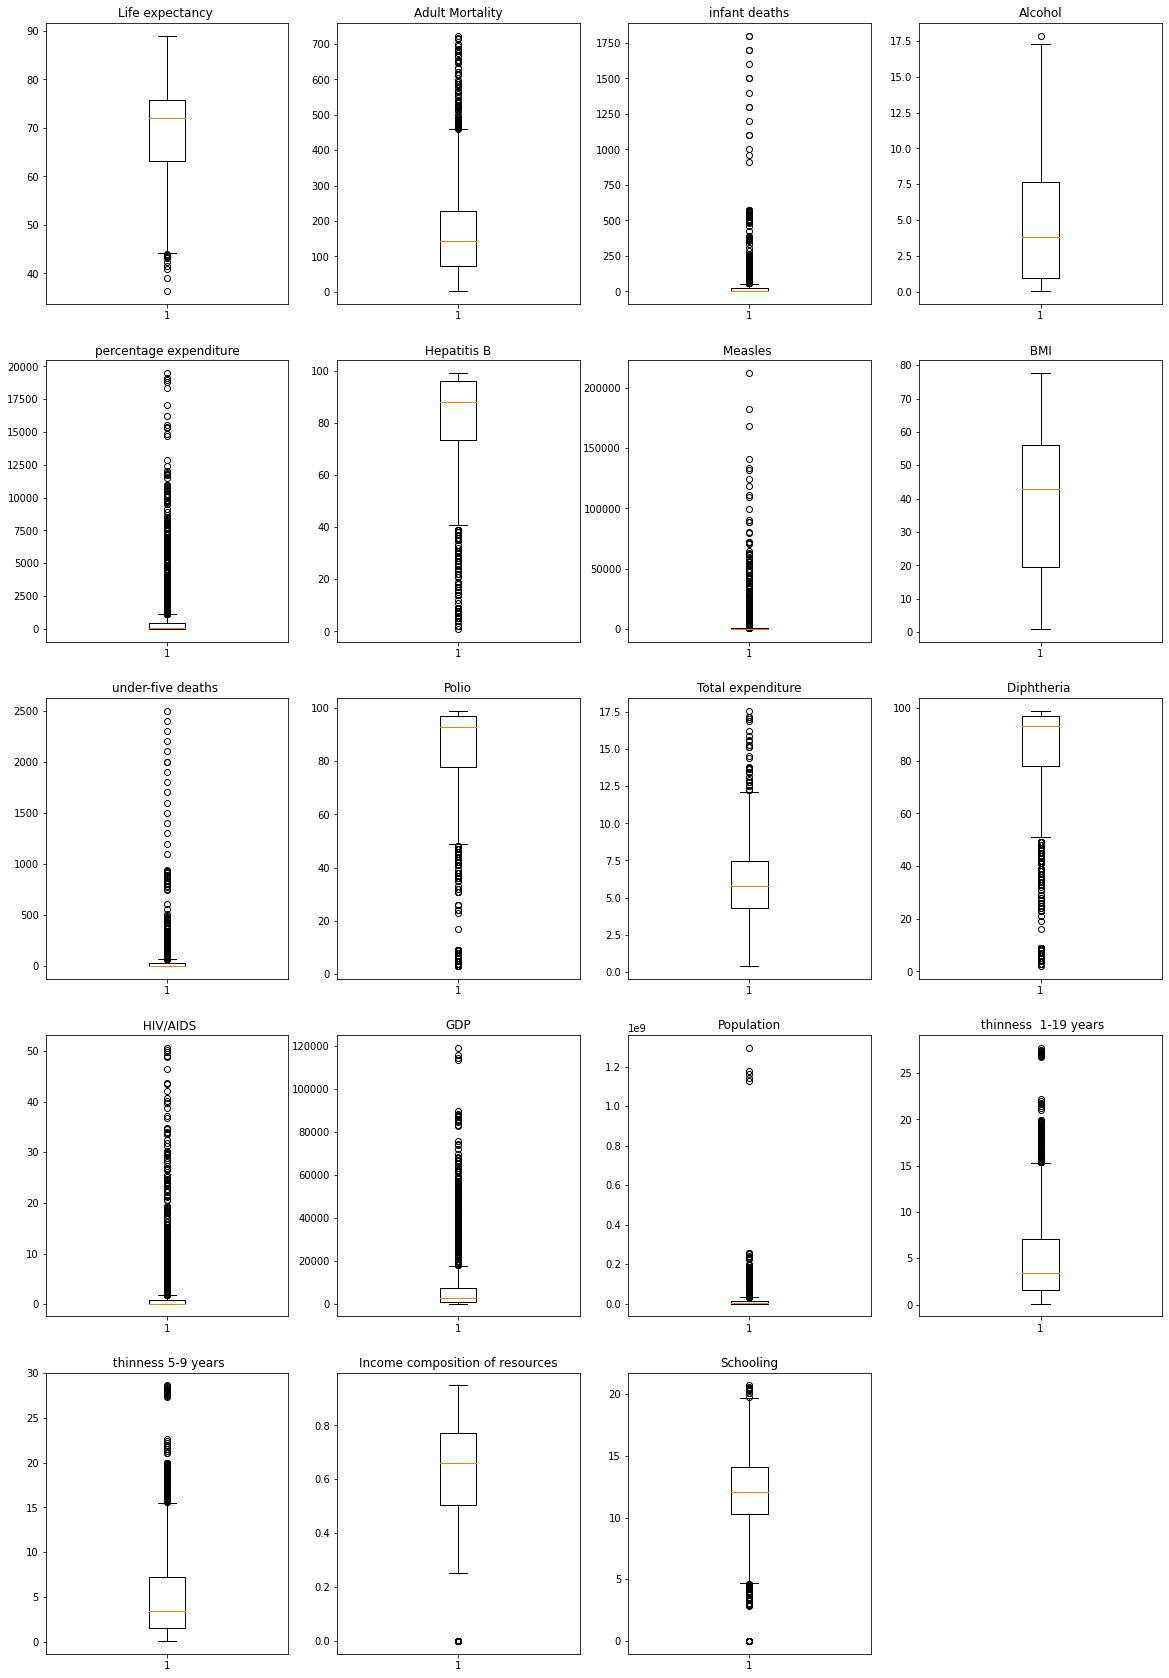

In [14]:
col_dict = {data.columns[3+i]:i+1 for i in range(len(data.columns[3:])) }

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [15]:
def fun(x,min_val,max_val):
    if x<min_val:
        return min_val
    elif x>max_val:
        return max_val
    else:
        return x

for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    data[variable] = data[variable].apply(lambda x:fun(x,min_val,max_val))


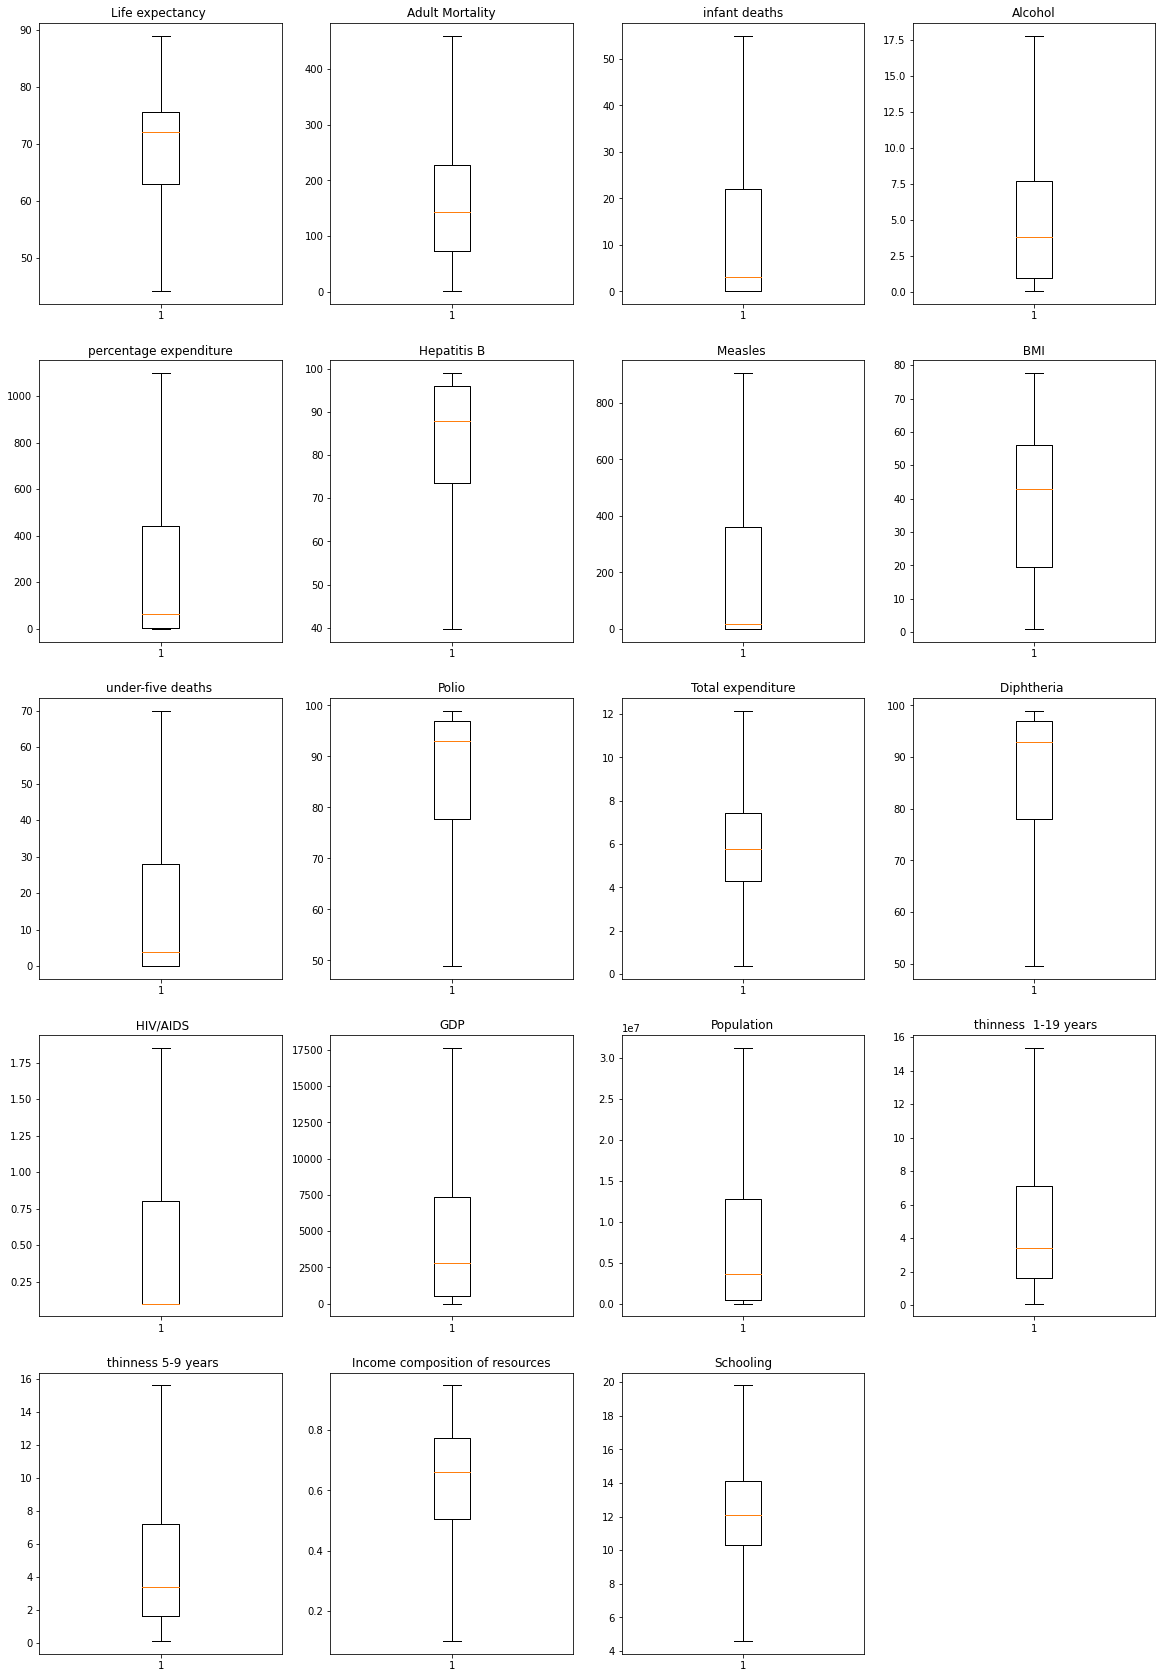

In [16]:
col_dict = {data.columns[3+i]:i+1 for i in range(len(data.columns[3:])) }

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

# Статистичний аналіз даних та EDA

In [17]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.233197,162.087432,13.681694,4.612076,284.889600,80.888637,235.469518,38.235394,18.027322,85.087595,5.886941,85.095092,0.537705,5020.579945,7.655618e+06,4.715751,4.734735,0.631881,12.047658
std,4.61056,9.500077,115.866689,19.124887,4.026226,390.385763,18.875131,355.694920,19.850184,25.215584,16.095897,2.353177,15.938161,0.694107,5564.073084,8.902348e+06,3.931216,3.974379,0.192110,3.098704
min,2000.00000,44.200000,1.000000,0.000000,0.010000,0.000000,39.750000,0.000000,1.000000,0.000000,48.875000,0.370000,49.500000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.100500,4.600000
25%,2003.75000,63.100000,74.000000,0.000000,0.950000,4.853964,73.500000,0.000000,19.400000,0.000000,77.750000,4.280000,78.000000,0.100000,560.979104,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,3.790000,65.611455,88.000000,17.000000,43.000000,4.000000,93.000000,5.785000,93.000000,0.100000,2832.342707,3.589254e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.680000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7389.061605,1.274585e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,459.000000,55.000000,17.775000,1099.254858,99.000000,905.625000,77.600000,70.000000,99.000000,12.155000,99.000000,1.850000,17631.185357,3.123744e+07,15.350000,15.600000,0.948000,19.800000


- Середня тривалість життя 69.224932.
- BMI значення вижче 35 вважається ненормальним, але ми маємо BMI-77, що є неможливим.
- Максимальна infant deaths на 1000 людей більша тисячі, що є неможливим.

<AxesSubplot:>

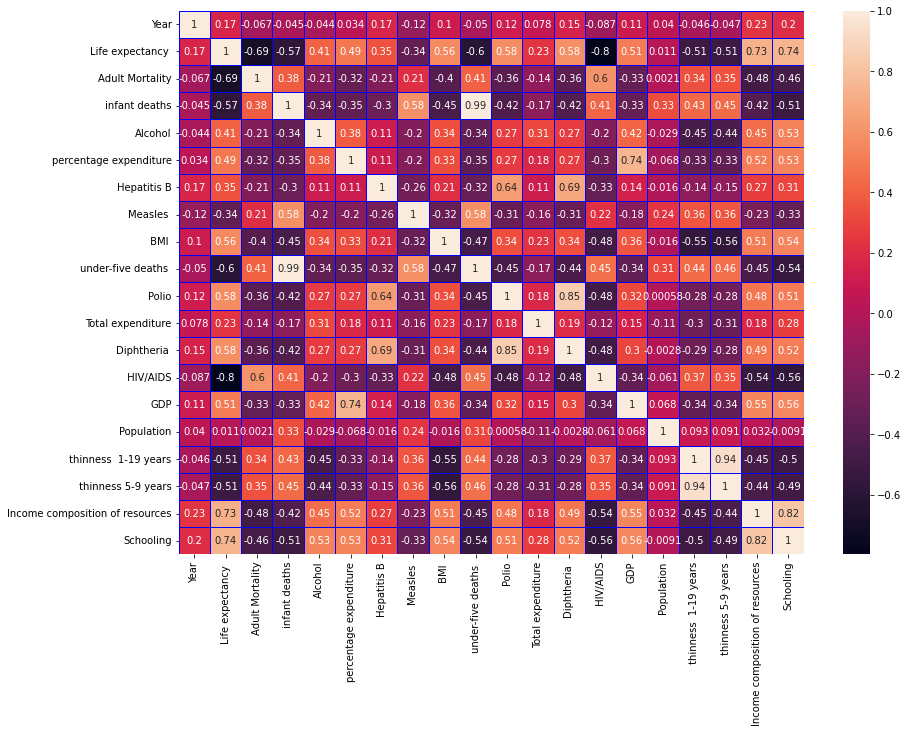

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,linecolor="blue",lw=0.5)

- LЕ має найгіршу відємну кореляцію з Adult Moratlity, HIV/AIDS, thinnes 1-19 years and thinness 5-9 years.
- LЕ має найкращу додатню кореляцію income composition of resourses and education.

In [227]:
means = data.groupby("Country").mean()
means

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,55.0000,0.014375,34.960110,64.562500,815.843750,15.51875,70.0000,57.515625,8.252500,59.09375,0.10000,340.015425,9.785178e+06,13.706250,13.11875,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.375000,49.06875,0.9375,98.125000,5.945625,98.06250,0.10000,2119.726679,6.969116e+05,1.618750,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,81.906250,379.921875,48.74375,23.5000,91.750000,4.604000,91.87500,0.10000,2847.853392,1.881558e+07,6.093750,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,55.0000,5.740667,102.100268,70.222222,712.304688,18.01875,70.0000,59.875000,3.919333,60.37500,1.85000,1975.143045,1.014710e+07,6.193750,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,669.530833,98.266667,0.000000,38.42500,0.0000,96.937500,4.791333,98.31250,0.12500,9759.305728,1.274585e+07,3.425000,3.37500,0.526312,10.56875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.420000,0.000000,70.531250,72.101562,54.48750,10.7500,77.242188,4.998667,73.93750,0.10000,7389.061605,1.274585e+07,1.650000,1.56250,0.726812,12.78750
Viet Nam,2007.5,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,670.664062,11.18750,36.5000,94.937500,5.977333,91.75000,0.14375,7389.061605,1.274585e+07,14.840625,15.35000,0.627062,11.51250
Yemen,2007.5,63.86250,211.8125,39.3750,0.047333,0.000000,61.234375,571.984375,33.48750,51.6250,69.679688,5.005333,72.62500,0.10000,7389.061605,1.274585e+07,13.831250,13.75000,0.475500,8.50625


Середня тривалість життя в період 2000-2015 років

In [19]:
years = data.groupby("Year")
years.mean()["Life expectancy "]

Year
2000    66.786885
2001    67.150273
2002    67.352459
2003    67.448087
2004    67.656831
2005    68.214208
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.091803
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: Life expectancy , dtype: float64

<AxesSubplot:title={'center':'Meaning life expectancy 2000-2015'}, xlabel='Year'>

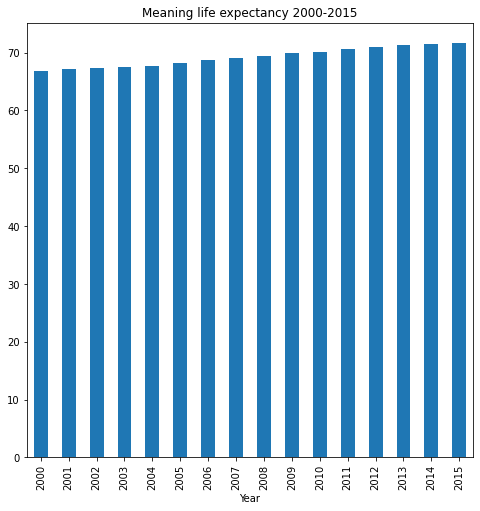

In [20]:
fig = plt.figure(figsize = (8,8))
plt.title("Meaning life expectancy 2000-2015")
years.mean()["Life expectancy "].plot.bar(x='Year',y='Life expectancy ')


Середє значення тривалості життя для країн

<AxesSubplot:title={'center':'Meaning life expectancy for countries'}, xlabel='Country'>

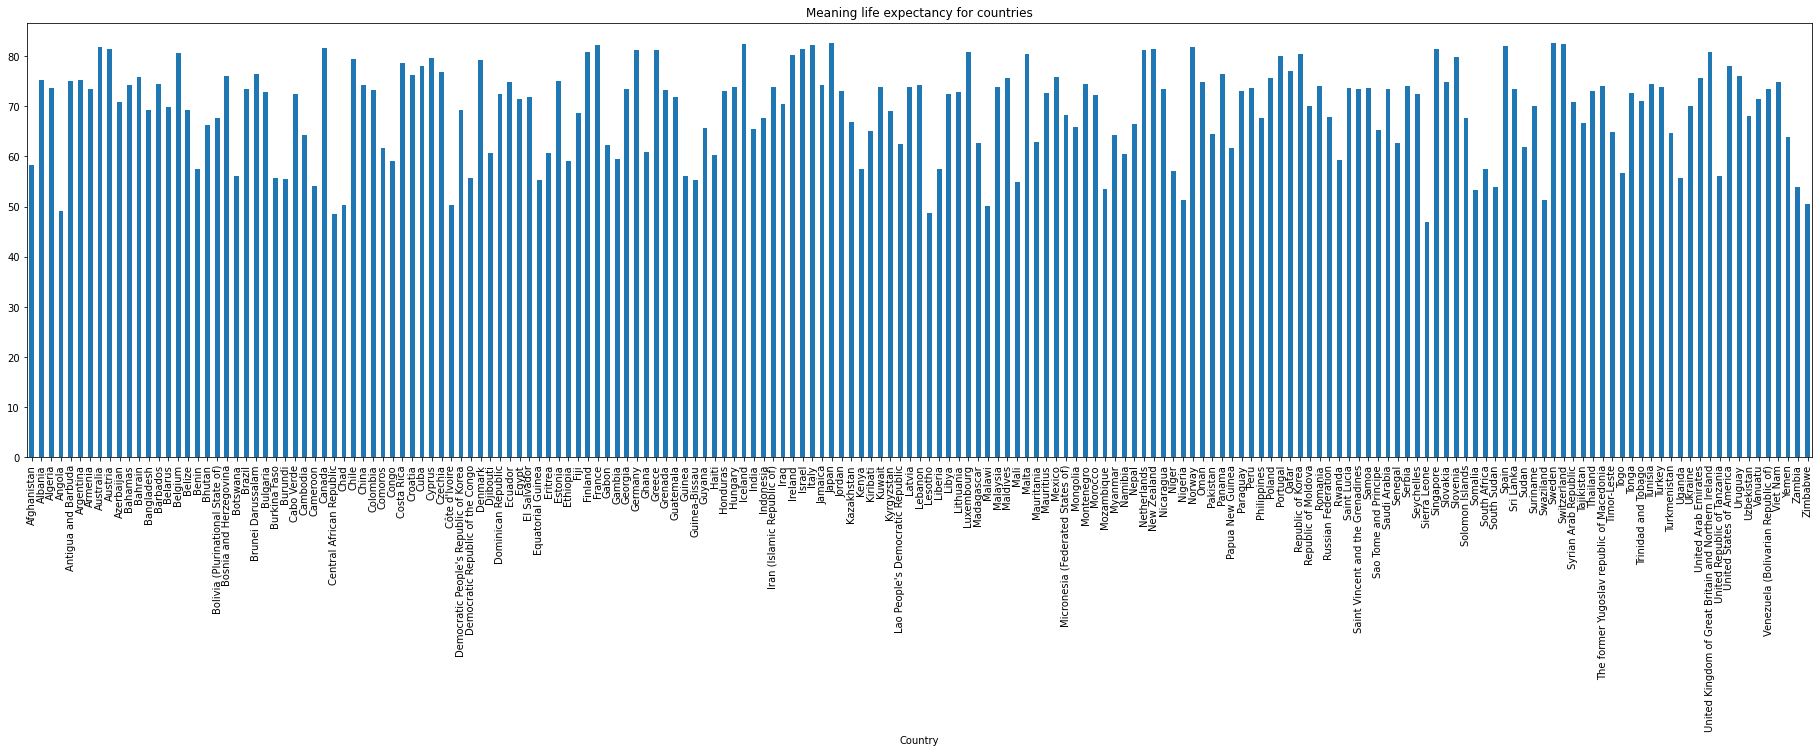

In [21]:
countries = data.groupby("Country")
mean_country = countries.mean()["Life expectancy "]
fig = plt.figure(figsize = (32,8))
plt.title("Meaning life expectancy for countries")
countries.mean()["Life expectancy "].plot.bar(x='Country',y='Life expectancy ')


In [22]:
mean_country = mean_country.sort_values(ascending=False)

Країни з найвищою тривалістю життя

In [23]:
mean_country.head()

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy , dtype: float64

Країни з найнижчою тривалістю життя

In [24]:
mean_country.tail()

Country
Malawi                      50.01875
Angola                      49.01875
Lesotho                     48.78125
Central African Republic    48.51250
Sierra Leone                46.98125
Name: Life expectancy , dtype: float64

- Країна з найвищою тривалістю життя - Japan
- Країна з нацнижчою тривалістю життя - Sierra Leone

C:\Users\olyad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


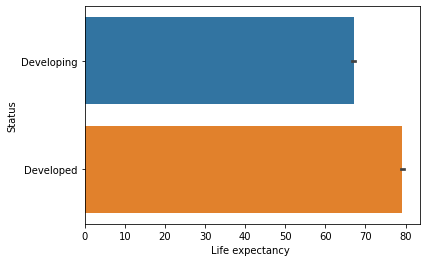

In [25]:
sns.barplot(data['Life expectancy '], data['Status'])
plt.show()

LE в розвинутих странах більша ніж в країнах, що розвиваються

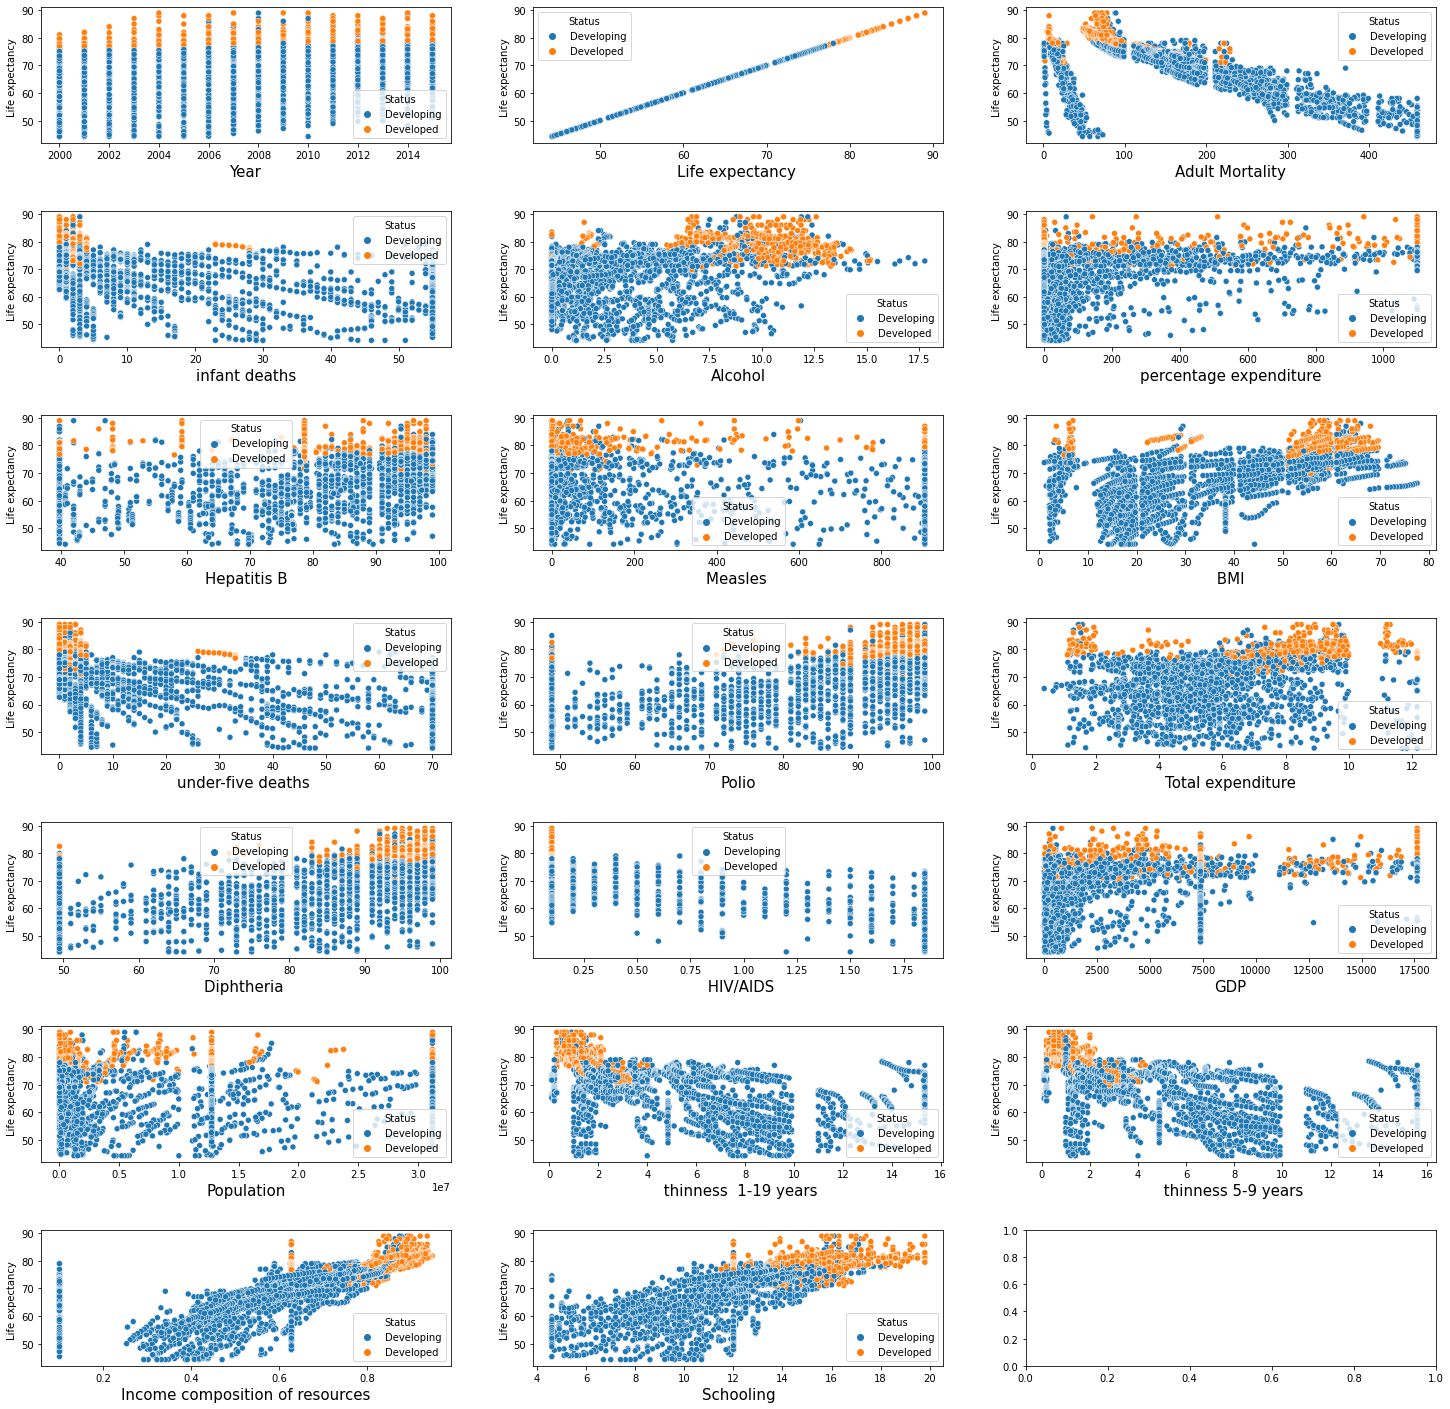

In [26]:
# Numerical featues against Life_Expetancy
fig, axs = plt.subplots(7,3, figsize=(25,25))
features=data.drop(["Country", "Status"], axis=1).columns
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(features):
    a = sns.scatterplot(x=feature, y='Life expectancy ', data=data, ax = axs.flat[c], hue='Status')
    a.set_xlabel(feature,fontsize=15)

- LE в розвинутих країнах є вища.
- Роки не дуже впливають на тривалість життя, але можна побачити, що с кожним роком вона поступово збільшуєтьсяю
- Infant death - малі в розвинутих країнах
- Alcohol - немає значного впливу на LE
- percentage expenditure- високий відсоток витрат трішки впливає на збільшення LE
- BMI- вищий показник показує краще LE
- under-five deaths- так само як й Infant death
- Diphtheria- в проміжку 20-50 LE-низький, вищі показники немають значного впливу на LE
- HIV/AIDS- Вищий HIV показує нижчу LE
- GDP - Вищий GDP показує кращу LE
- Population - більша Population показує кращу LE
- thinness- збільшення цього показниуа знижує LE
- Income composition of resources- збільшення значення показує збільшення LE 
- Schooling - збільшення значення показує збільшення LE

# Підготовка даних до класифікації

In [31]:
def encode_status(x):
    if x == 'Developed':
        return 1
    else:
        return 0

data['Status'] = data['Status'].apply(encode_status)

data = pd.concat([data, pd.get_dummies(data['Country'], prefix='Country', drop_first=True)], axis=1)
data = data.drop(['Country'], axis=1)

data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,0,65.0,263.0,55.0,0.01,71.279624,65.00,905.625,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,55.0,0.01,73.523582,62.00,492.000,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,55.0,0.01,73.219243,64.00,430.000,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,55.0,0.01,78.184215,67.00,905.625,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,55.0,0.01,7.097109,68.00,905.625,17.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2004,0,44.3,459.0,27.0,4.36,0.000000,68.00,31.000,27.1,...,0,0,0,0,0,0,0,0,0,1
2924,2003,0,44.5,459.0,26.0,4.06,0.000000,39.75,905.625,26.7,...,0,0,0,0,0,0,0,0,0,1
2925,2002,0,44.8,73.0,25.0,4.43,0.000000,73.00,304.000,26.3,...,0,0,0,0,0,0,0,0,0,1
2926,2001,0,45.3,459.0,25.0,1.72,0.000000,76.00,529.000,25.9,...,0,0,0,0,0,0,0,0,0,1


- Split

In [52]:
Model_Compare = [[]]

X_feature = data.drop('Life expectancy ', axis=1)

Y_label = data['Life expectancy ']

X_feature_train,X_feature_test,Y_label_train,Y_label_test=train_test_split(X_feature,Y_label,test_size=0.2, 
                                     random_state=42, shuffle=True)

print('X_feature_training_set : ', X_feature_train.shape)
print('X_feature_test_set : ', X_feature_test.shape)
print('Y_label_train_set :', Y_label_train.shape) 
print('Y_label_test_set : ', Y_label_test.shape)

X_feature_training_set :  (2342, 566)
X_feature_test_set :  (586, 566)
Y_label_train_set : (2342,)
Y_label_test_set :  (586,)


# Linear Regresssion

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_feature_train,Y_label_train)

Y_pred = lin_reg.predict(X_feature_train)

lr_train_mse = mean_squared_error(Y_label_train,Y_pred)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_r2_score = r2_score(Y_label_train,Y_pred)

test_score = lin_reg.score(X_feature_test, Y_label_test)

print("Linear Regression:")
print("Mean squared error: %.2f"%lr_train_mse)
print("Root Mean Squared error: %.2f"%lr_train_rmse)
print("R^2 score for lin_reg training set: %.2f"%lr_r2_score)
print("Test-set score:",test_score)

Model_Compare[0] = ['Linear Regression', round(lr_train_mse,3), round(lr_train_rmse,3), round(lr_r2_score, 3), round(test_score,3)]

Linear Regression:
Mean squared error: 3.55
Root Mean Squared error: 1.88
R^2 score for lin_reg training set: 0.96
Test-set score: 0.9523572787994578


# Random Forest Classifier

In [54]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_feature_train,Y_label_train)

#Make predictions
Y_pred = forest_reg.predict(X_feature_train)

#Calculating MSE and RMSE
rf_train_mse = mean_squared_error(Y_label_train,Y_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

#Calculating r2 score
forest_r2_score = r2_score(Y_label_train,Y_pred)

#Testing score
test_score = forest_reg.score(X_feature_test, Y_label_test)

print('Random Forest:')
print("Mean squared error: %.2f"%rf_train_mse)
print("Root Mean Squared error: %.2f"%rf_train_rmse)
print("R^2 score for forest training set: %.2f"%forest_r2_score)
print("Test-set score:",forest_reg.score(X_feature_test, Y_label_test))

Model_Compare.append(['Random Forest', round(rf_train_mse,3), round(rf_train_rmse,3), round(forest_r2_score, 3), round(test_score,3)])

Random Forest:
Mean squared error: 0.46
Root Mean Squared error: 0.68
R^2 score for forest training set: 0.99
Test-set score: 0.9674589097981963


# Decision Tree Classifier

In [55]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_feature_train,Y_label_train)
y_pred = tree_reg.predict(X_feature_train)

tree_train_mse = mean_squared_error(Y_label_train,y_pred)
tree_train_rmse = np.sqrt(rf_train_mse)
tree_r2_score = r2_score(Y_label_train, y_pred)
tree_test_score = tree_reg.score(X_feature_test, Y_label_test)

print('Decision Tree:')
print("Mean squared error: %.2f"%tree_train_mse)
print("Root Mean Squared error: %.2f"%tree_train_rmse)
print("R^2 score for forest training set: %.2f"%tree_r2_score)
print("Test-set score:",tree_reg.score(X_feature_test, Y_label_test))

Model_Compare.append(['Decision Tree', round(tree_train_mse,3), round(tree_train_rmse,3), round(tree_r2_score, 3), round(tree_test_score,3)])

Decision Tree:
Mean squared error: 0.00
Root Mean Squared error: 0.68
R^2 score for forest training set: 1.00
Test-set score: 0.9285697624062487


In [56]:
Comparision_Table = pd.DataFrame(Model_Compare, columns=['Model','MSE','RMSE','R2 Score','Test-Score']).set_index("Model")
print(Comparision_Table)

                     MSE   RMSE  R2 Score  Test-Score
Model                                                
Linear Regression  3.548  1.884     0.961       0.952
Random Forest      0.458  0.676     0.995       0.967
Decision Tree      0.000  0.676     1.000       0.929


- Найкраща модель - Random Forest